# Analysis and Visualization of Titanic Dataset

The dataset is taken from kaggle. It consist of 12 columns and 891 rows.
Description of each column is given below:
1. PassengerID: A unique id to each passenger (1 to 891)
2. Survived: A boolean variable (1-survived, 0-dead)
3. Pclass: Ticket class (1st, 2nd, 3rd class)
4. Name: Passenger Name
5. Sex: Gender of passenger
6. Age: Age of passenger
7. SibSp: No. of siblings/spouses aboard
8. Parch: No. of parents/ children aboard the titanic
9. Ticket: Ticket number
10. Fare: Passenger fare
11. Cabin: Cabin number
12. Embarked: Port of embarkation (C-Cherbourg, Q-Queenstown, S-Southampton)

In [1]:
# importing the files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv("C:/Users/pawar/Downloads/titanic_data.csv")

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [17]:
data.shape

(891, 12)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


It is observed that, we have missing values in the columns: Age, cabin, Embarked.
Missing values of cabin will not be fixed since it won't have much bearing on the analysis.

Missing values of Age and Embarked will be fixed now!

# dealing with missing values

In [24]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [26]:
data['Age'].skew()

0.38910778230082704

In [32]:
data['Age']=data['Age'].fillna(data['Age'].mean()) # filling null values with mean

In [34]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
data['Embarked']=data['Embarked'].fillna('Q') # filling null values with Q

# Data Analysis

Q.Did passenger class made any difference to his survival?

In [47]:
sclass=data.groupby(['Pclass']).agg({'Survived':'sum'})
tclass=data.groupby(['Pclass']).agg({'Pclass':'count'})
tclass.rename(columns={'Pclass':'Total'},inplace=True)
df=pd.merge(sclass, tclass, left_index=True, right_index=True)
percent=(df['Survived']/df['Total'])*100
df['Percentage']=percent
df

,Survived,Total,Percentage
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


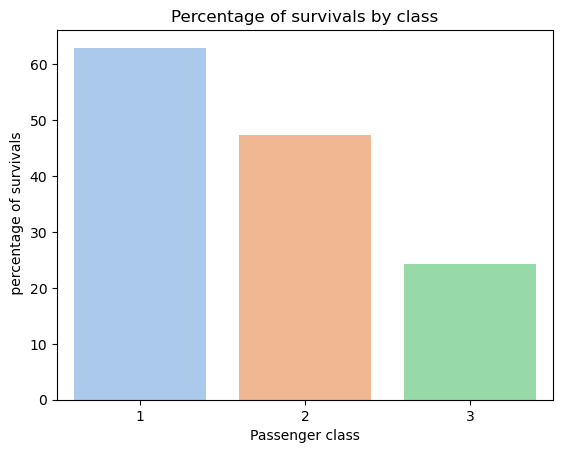

In [67]:
sns.barplot(x='Pclass',y='Percentage',palette="pastel",data=df)
plt.title("Percentage of survivals by class")
plt.xlabel('Passenger class')
plt.ylabel(' percentage of survivals')
plt.show()

Conclusion:
As can be seen from the dataframe table and the bar plot, 1st class passengers had highest rate of survival, then 2nd class passengers, and the least survival rates was of 3rd class passengers. A large number of passengers were travelling in 3rd class(491), but only 24.23% survived.

Q.Which gender has more survival?

In [51]:
survived=data.groupby(['Sex']).agg({'Survived':'sum'})
total=data.groupby(['Sex']).agg({'Survived':'size'})
total.rename(columns={'Survived':'Total'},inplace=True)
df1=pd.merge(survived, total, left_index=True, right_index=True)
percent=(df1['Survived']/df1['Total'])*100
df1['Percentage']=percent
df1

,Survived,Total,Percentage
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


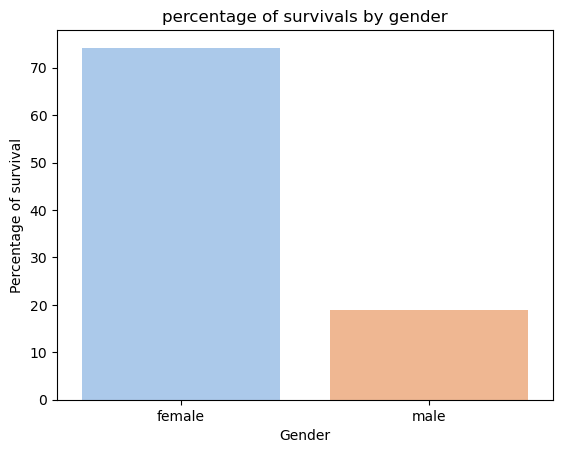

In [65]:
sns.barplot(x='Sex',y='Percentage',palette="pastel",data=df1)
plt.title("percentage of survivals by gender")
plt.xlabel('Gender')
plt.ylabel('Percentage of survival')
plt.show()

Conclusion:
From the percentage of survival from the dataframe above, We can see that female had very high rate of survival. Female survival rate was 74.20% whereas, male survival rate was 18.89%. 
It can be concluded that, females were given preference in rescue operations, and males must have sacrifice themselves to let the females survive.